Datasett oppgave 3

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/MartinLOlsen/ISTG-prosjekt-16/main/ny_data_oppgave_3.csv", header=0)

print(df)

    maaling nr.  hoyde (laser)  hoyde (maalebaand)
0             1          227.0               226.0
1             2          226.0               225.5
2             3          228.0               226.0
3             4          227.5               225.0
4             5          228.0               223.5
5             6          226.5               225.5
6             7          226.5               222.5
7             8          229.0               223.5
8             9          225.5               225.0
9            10          227.0               225.0
10           11          226.5               222.0
11           12          228.0               222.5
12           13          227.5               223.5
13           14          227.0               223.0
14           15          227.0               221.5
15           16          226.5               223.5
16           17          225.5               222.0
17           18          228.0               222.5
18           19          227.0 

Nøkkeltall oppgave 3

In [44]:
X_snitt_laser = np.mean(df["hoyde (laser)"])
print(f"Gjennomsnittet av lasermålingene er {round(X_snitt_laser, 4)}")

SD_X_laser = np.std(df["hoyde (laser)"])
print(f"Standardavviket til lasermålingene er {round(SD_X_laser, 4)}")

S2_laser = np.var(df["hoyde (laser)"], ddof=1)
print(f"Variansen til lasermålingene er {round(S2_laser, 4)}")

X_snitt_maalebaand = np.mean(df["hoyde (maalebaand)"])
print(f"Gjennomsnittet av målebånd-målingene er {round(X_snitt_maalebaand, 4)}")

SD_X_maalebaand = np.std(df["hoyde (maalebaand)"])
print(f"Standardavviket til målebånd-målingene er {round(SD_X_maalebaand, 4)}")

S2_maalebaand = np.var(df["hoyde (maalebaand)"], ddof=1)
print(f"Variansen til målebånd-målingene er {round(S2_maalebaand, 4)}")

Gjennomsnittet av lasermålingene er 227.2
Standardavviket til lasermålingene er 0.8185
Variansen til lasermålingene er 0.6837
Gjennomsnittet av målebånd-målingene er 223.62
Standardavviket til målebånd-målingene er 1.1382
Variansen til målebånd-målingene er 1.322


Usikkerhet for laser

In [45]:
n = df['maaling nr.'].count() # antall målinger
SE_laser = SD_X_laser / np.sqrt(n) # standardfeil for laser

t = stats.t.ppf(0.975, n - 1) # t-verdi for 95% konfidensintervall
k = 2
margin_laser = t * SE_laser
nedre_laser = X_snitt_laser - margin_laser # nedre grense i konfidensintervallet
ovre_laser = X_snitt_laser + margin_laser # øvre grense i konfidensintervallet

print(f'Standardfeil for laser: {SE_laser:.4f}')
print(f'95% konfidensintervall: [{nedre_laser:.4f}, {ovre_laser:.4f}]')
print(f'Målt høyde med dekningsfaktor k={k}: {X_snitt_laser:.4f} ± {k*SE_laser:.4f}')

Standardfeil for laser: 0.1158
95% konfidensintervall: [226.9674, 227.4326]
Målt høyde med dekningsfaktor k=2: 227.2000 ± 0.2315


Usikkerhet for målebånd

In [46]:
n = df['maaling nr.'].count() # antall målinger
SE_maalebaand = SD_X_maalebaand / np.sqrt(n) # standardfeil for målebånd

t= stats.t.ppf(0.975, n - 1) # t-verdi for 95% konfidensintervall
margin_maalebaand = t * SE_maalebaand
nedre_maalebaand = X_snitt_maalebaand - margin_maalebaand # nedre grense i konfidensintervallet
ovre_maalebaand = X_snitt_maalebaand + margin_maalebaand # øvre grense i konfidensintervallet

print(f'Standardfeil for målebånd: {SE_maalebaand:.4f}')
print(f'95% konfidensintervall: [{nedre_maalebaand:.4f}, {ovre_maalebaand:.4f}]')
print(f'Målt høyde med dekningsfaktor k={k}: {X_snitt_maalebaand:.4f} ± {k*SE_maalebaand:.4f}')

Standardfeil for målebånd: 0.1610
95% konfidensintervall: [223.2965, 223.9435]
Målt høyde med dekningsfaktor k=2: 223.6200 ± 0.3219


Hypotesetest

Signifikansnivå α = 0.05, tosidig test, dvs H0 forkastes dersom |T-verdi| > t_(α/2, n-1)

H0: Ingen forskjell mellom gjennomsnittene til måleinstrumentene (µ_laser = µ_målebånd)
H1: Det er en forskjell på gjennomsnittene (µ_laser =/= µ_målebånd)

In [15]:
alpha = 0.05 # signifikansnivå
t = stats.t.ppf(1-alpha/2, 2*n - 2) # kritisk verdi for kontroll av hypotesetest

D = X_snitt_laser - X_snitt_maalebaand # differanse i gjennomsnitt
S2 = ((n - 1) * S2_laser + (n - 1) * S2_maalebaand) / (2*n - 2) # interpolert varians
SE_D = np.sqrt(S2)*np.sqrt(2/n) # standardfeil for differansen

T = D/SE_D # testobservator
print(f"Kritisk T-verdi: {t:.4f}")
print(f"P-verdi: {p}")
print(f"T-verdi: {T:.4f}")

if np.abs(T) > t:
    print("Forkast nullhypotesen: Det er en signifikant forskjell mellom de to målemetodene.")
else:
    print("Forkast ikke nullhypotesen: Det er ingen signifikant forskjell mellom de to målemetodene.")

Kritisk T-verdi: 2.0096
P-verdi: 3.3908918731862907e-31
T-verdi: 17.8745
Det er en forskjell på gjennomsnittene, H0 forkastes.


Visualisering

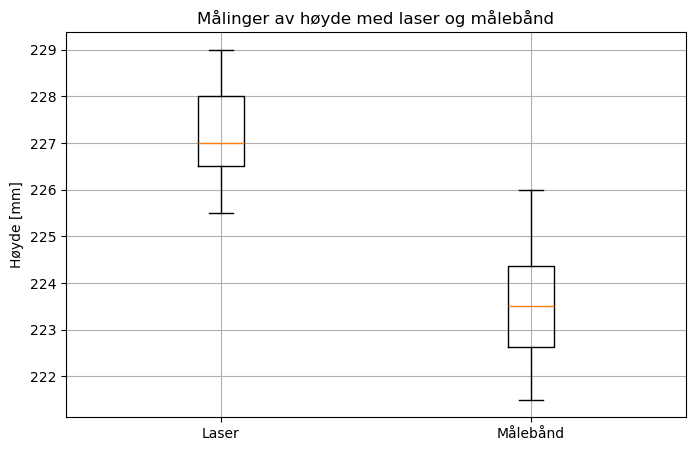

In [48]:
l = df["hoyde (laser)"]
m = df["hoyde (maalebaand)"]

plt.figure(figsize=(8, 5))
plt.boxplot([l, m], tick_labels=['Laser', 'Målebånd'])

plt.title('Målinger av høyde med laser og målebånd')
plt.ylabel('Høyde [mm]')
plt.grid(True)
plt.show()
